# Neural Network using the MNIST dataset

## Importing libraries and dataset

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam, SGD
from keras.utils import to_categorical
np.random.seed(42)  # to ensure that the output is consistent across different program runs

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
print('Total no of Images: ',X_train.shape[0])
print('Size of Image:', X_train.shape[1:])
print('Total no of labels:', y_train.shape)

Total no of Images:  60000
Size of Image: (28, 28)
Total no of labels: (60000,)


## Visualising the dataset

Label: 5


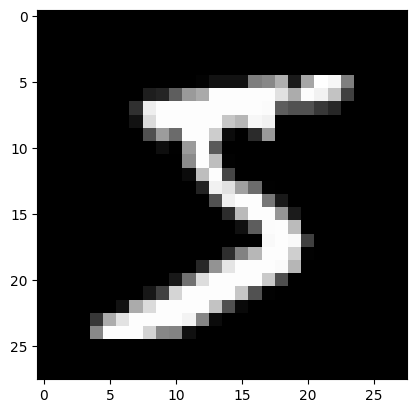

In [4]:
plt.imshow(X_train[0], cmap = plt.get_cmap('gray'))  # converts image into grayscale
print('Label:', y_train[0])

## Preprocessing

### Resizing images

In [5]:
X_train = X_train.reshape((X_train.shape[0],-1))  # reduces dimension of tensor by 1 (from 2 to 1)
X_test = X_test.reshape((X_test.shape[0], -1))

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


### Normalisation

In [6]:
X_train = X_train/255
X_test = X_test/255

print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [7]:
X_train.shape

(60000, 784)

### One-hot encoding

In [8]:
y_train = to_categorical(y_train)    # used when data is already in int format
y_test = to_categorical(y_test)

print(y_train.shape)

(60000, 10)


In [9]:
num_classes = y_test.shape[1]
num_pixels = 784

## Model Training

### Defining the model

In [10]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(256, input_dim=num_pixels, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='sigmoid'))

    return model

### Creating the model

In [11]:
model = baseline_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 244522 (955.16 KB)
Trainable params: 244522 (955.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compiling the model

In [12]:
opt = SGD(learning_rate = 0.001)
model.compile(loss='categorical_crossentropy', optimizer= opt, metrics=['accuracy'])

### Training the model

In [13]:
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
1875/1875 [==============================] - 3s 1ms/step - loss: 2.1797 - accuracy: 0.3142
Epoch 2/50
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5812 - accuracy: 0.6104
Epoch 3/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8348 - accuracy: 0.7780
Epoch 4/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5534 - accuracy: 0.8440
Epoch 5/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4413 - accuracy: 0.8751
Epoch 6/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3843 - accuracy: 0.8904
Epoch 7/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3479 - accuracy: 0.9003
Epoch 8/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3214 - accuracy: 0.9076
Epoch 9/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3005 - accuracy: 0.9141
Epoch 10/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.283

## Model Evaluation

In [14]:
scores = model.evaluate(X_test, y_test, verbose=1)
print("Error: %.2f%%" % (100-scores[1]*100))

313/313 [==============================] - 0s 1ms/step - loss: 0.1066 - accuracy: 0.9669
Error: 3.31%


In [15]:
x = np.expand_dims(X_test[0], axis=0)

In [16]:
preds = model.predict(x)

classes_x=np.argmax(preds,axis=1)


print('Predicted value is ',classes_x[0])

1/1 [==============================] - 0s 58ms/step
Predicted value is  7


In [17]:
print(y_test[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
